# M5 Forecasting - Accuracy

Explora y visualiza distintos insights utilizando el dataset:

M5 Forecasting - Accuracy | Kaggle

https://www.kaggle.com/c/m5-forecasting-accuracy/data

Nota: No esperamos que hagas forecasting con el dataset, puedes utilizar la herramienta que tu prefieras (Power BI, Tableau, Excel, Python, etc)

Esta entrevista se lleva a cabo de manera presencial en nuestras oficinas. Te pedimos llegar con 15 minutos de anticipación y tener una identificación oficial (INE ó Pasaporte) para autorizar el acceso.

## Setup

Libraries used for the project

In [23]:
#import chardet
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
#import pymssql
import seaborn as sns
import gc

## Reading dataset

Sourse (https://www.kaggle.com/competitions/m5-forecasting-accuracy/data)

Files information provided by sourse and visualization:
1. calendar.csv
- Contains information about the dates on which the products are sold
- Temporary information about events and promotions
- Period: 01/29/2011-06/19/2016
2. sell_prices.csv
- Contains information about the price of the products sold per store and date.
- Record of how the price of each product (3049) have evolved over time within each of the branches(10).
3. sales_train_evaluation.csv
- Includes sales [d_1 - d_1941] (labels used for the Public leaderboard)



In [24]:
#Modificar ruta de lectura
os.chdir('D:\FANNY\DOCUMENTOS\ANALISIS DE DATOS\Ventagium\m5-forecasting-accuracy')
#Lectura de archivos
calendar = pd.read_csv('calendar.csv')
evaluation = pd.read_csv('sales_train_evaluation.csv')
#validation = pd.read_csv('sales_train_validation.csv')
#submission = pd.read_csv('sample_submission.csv')
prices = pd.read_csv('sell_prices.csv')

## Data massaging

In [25]:
#Columns 'event_name_2' and 'event_type_2' will be removed due to their low representation and limited impact on the analysis.
calendar = calendar.drop(['event_name_2', 'event_type_2'], axis=1)
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,1,0,1


In [26]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [27]:
# Columns 'id' and 'dept_id' will be removed do to lack of meaningful information
evaluation = evaluation.drop(['id', 'dept_id'], axis=1)
evaluation.head()

,item_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


### Null values

In [28]:
print(f'There are {calendar.isna().sum().sum()} null values in the calendar dataset')
print(f'There are {prices.isna().sum().sum()} null values in the prices dataset')
print(f'There are {evaluation.isna().sum().sum()} null values in the evaluation dataset')

There are 3614 null values in the calendar dataset
There are 0 null values in the prices dataset
There are 0 null values in the evaluation dataset


### Duplicated values

In [29]:
print(f'There are {calendar.duplicated().sum()} duplicated values in the calendar dataset')
print(f'There are {prices.duplicated().sum()} duplicated values in the prices dataset')
print(f'There are {evaluation.duplicated().sum()} duplicated values in the evaluation dataset')

There are 0 duplicated values in the calendar dataset
There are 0 duplicated values in the prices dataset
There are 0 duplicated values in the evaluation dataset


### Ensure consistent data types and reducing memory requirements

In [30]:
for col in ['event_name_1', 'event_type_1','snap_CA','snap_TX','snap_WI']:
    calendar[col] = calendar[col].astype('category')
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    category      
 8   event_type_1  162 non-null    category      
 9   snap_CA       1969 non-null   category      
 10  snap_TX       1969 non-null   category      
 11  snap_WI       1969 non-null   category      
dtypes: category(5), datetime64[ns](1), int64(4), object(2)
memory usage: 119.3+ KB


In [31]:
for col in ['store_id', 'item_id']:
    prices[col] = prices[col].astype('category')
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    int64   
 3   sell_price  float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 124.0 MB


In [32]:
for col in ['item_id', 'cat_id', 'store_id', 'state_id']:
    evaluation[col] = evaluation[col].astype('category')
evaluation.head()

,item_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005,HOBBIES,CA_1,CA,0,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [33]:
# Transposing sales data to have dates as a column
evaluation_long = pd.melt(evaluation,
                     id_vars=['item_id', 'cat_id', 'store_id', 'state_id'],
                     var_name='d',
                     value_name='sales')
# Deleting data to reduce 
del evaluation
gc.collect()
evaluation_long.head()
#Creating CSV files to read them and join them with SQL
#calendar.to_csv('calendar_fixed.csv', index=False)
#evaluation_long.to_csv('evaluation_long.csv', index=False)

,item_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005,HOBBIES,CA_1,CA,d_1,0


In [34]:
evaluation_long.head()

,item_id,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_001,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005,HOBBIES,CA_1,CA,d_1,0


### SQL Connection to create joints

In [35]:
#import pyodbc
#from sqlalchemy import create_engine
#from sqlalchemy import text

#Connection parameters
#server = 'LAPTOP-DBH59CJ0'
#database = 'M5 Forecasting - Accuracy'
#driver = 'ODBC Driver 17 for SQL Server' 

# Creating connection with SQLAlchemy
#engine = create_engine(f"mssql+pyodbc://{server}/{database}?trusted_connection=yes&driver={driver}&database={database}")

# Saving evaluation_long in SQL database
# It needed to be melted using Python do to SQL columns limit
#evaluation_long.to_sql('evaluation', con=engine, schema='dbo', if_exists='replace', index=False)
#print("Datos insertados correctamente en SQL Server.")

In [36]:
# Merging with calendar to get date information
evaluation_long = evaluation_long.merge(calendar[['d', 'date','wm_yr_wk','event_name_1','event_type_1','snap_CA','snap_TX','snap_WI']], on='d', how='left')
evaluation_long['date'] = pd.to_datetime(evaluation_long['date'])

evaluation_long.head()

,item_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,event_name_1,event_type_1,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0,0,0
1,HOBBIES_1_002,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0,0,0
2,HOBBIES_1_003,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0,0,0
3,HOBBIES_1_004,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0,0,0
4,HOBBIES_1_005,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN,NaN,0,0,0


In [37]:
# Merge sales data with prices data to get the price for each item at each date
#evaluation_long = evaluation_long.merge(prices, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')
#del prices
#gc.collect()

In [38]:
# Create a new column for sales in money by multiplying sales quantity by sell_price
#evaluation_long['sales_money'] = evaluation_long['sales'] * evaluation_long['sell_price']

# Check the first few rows to ensure the new column is added correctly
#evaluation_long.head()

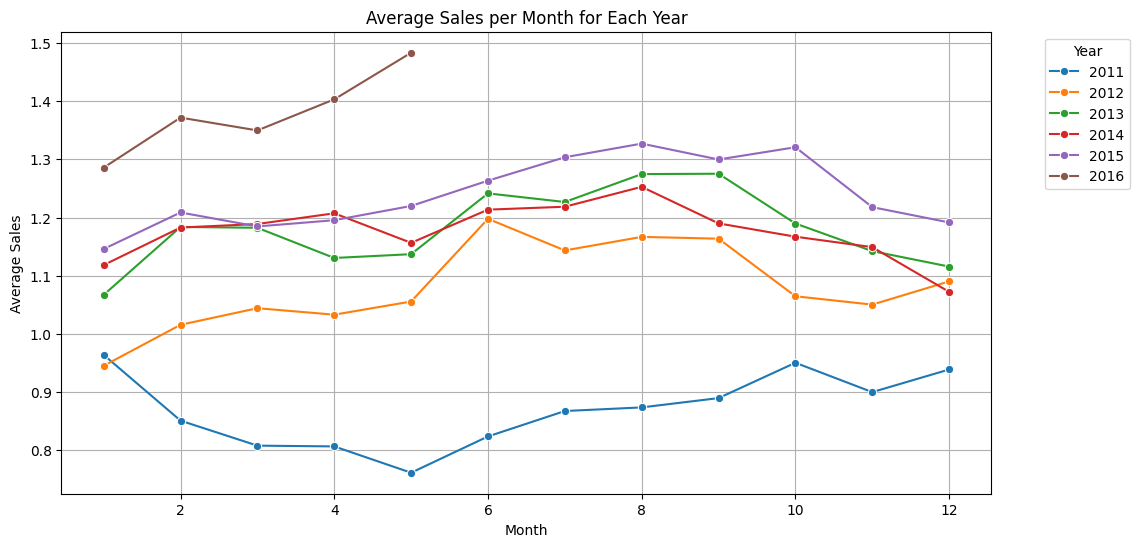

In [39]:
# Extract month and year if not already done
evaluation_long['year'] = evaluation_long['date'].dt.year
evaluation_long['month'] = evaluation_long['date'].dt.month

# Group by month and year to get average sales
monthly_sales = evaluation_long.groupby(['year', 'month']).agg({'sales': 'mean'}).reset_index()

# Plot average sales per month for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', marker='o', palette='tab10')
plt.title('Average Sales per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid()
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

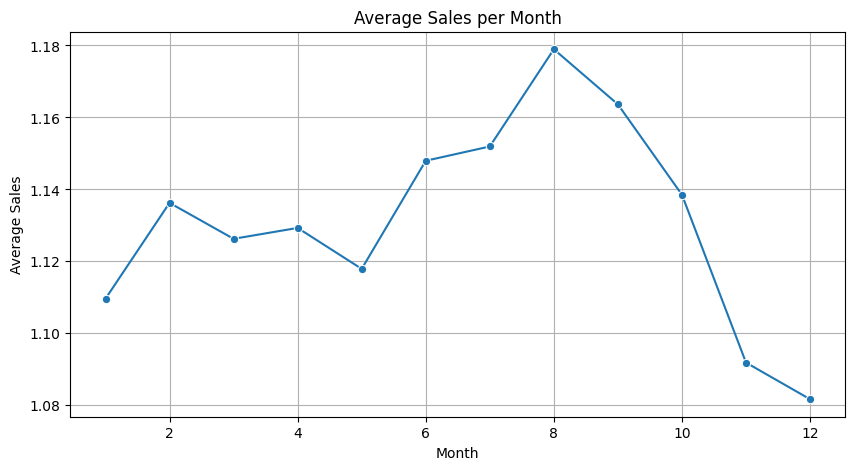

In [40]:
monthly_sales = evaluation_long.groupby('month').agg({'sales': 'mean'}).reset_index()

# Plot monthly sales pattern
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='month', y='sales', marker='o')
plt.title('Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid()
plt.show()

In [41]:
evaluation_long['month'] = evaluation_long['date'].dt.month
evaluation_long['day_of_week'] = evaluation_long['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
evaluation_long['year'] = evaluation_long['date'].dt.year

In [42]:
evaluation_long['year_month'] = evaluation_long['date'].dt.to_period('M')
# Calculate average sales per store per month
monthly_sales = evaluation_long.groupby(['store_id', 'year_month']).agg({'sales': 'mean'}).reset_index()

# Rename the sales column for clarity
monthly_sales = monthly_sales.rename(columns={'sales': 'avg_sales_per_month'})
monthly_sales

C:\Users\estef\AppData\Local\Temp\ipykernel_12092\2045525919.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = evaluation_long.groupby(['store_id', 'year_month']).agg({'sales': 'mean'}).reset_index()


,store_id,year_month,avg_sales_per_month
0,CA_1,2011-01,1.236252
1,CA_1,2011-02,1.047580
2,CA_1,2011-03,0.988881
3,CA_1,2011-04,1.000907
4,CA_1,2011-05,0.930903
...,...,...,...
645,WI_3,2016-01,1.197876
646,WI_3,2016-02,1.305199
647,WI_3,2016-03,1.264910
648,WI_3,2016-04,1.313819


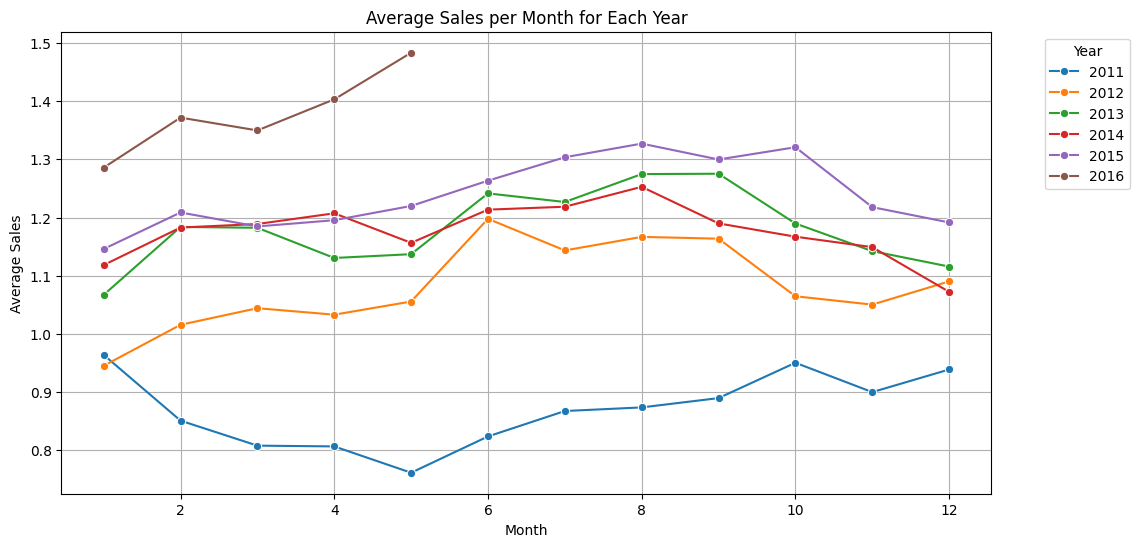

In [43]:
# Extract month and year if not already done
evaluation_long['year'] = evaluation_long['date'].dt.year
evaluation_long['month'] = evaluation_long['date'].dt.month

# Group by month and year to get average sales
monthly_sales = evaluation_long.groupby(['year', 'month']).agg({'sales': 'mean'}).reset_index()

# Plot average sales per month for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', marker='o', palette='tab10')
plt.title('Average Sales per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid()
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\estef\AppData\Local\Temp\ipykernel_12092\400286783.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_sales = evaluation_long.groupby(['store_id', 'date']).agg({'sales': 'sum'}).reset_index()


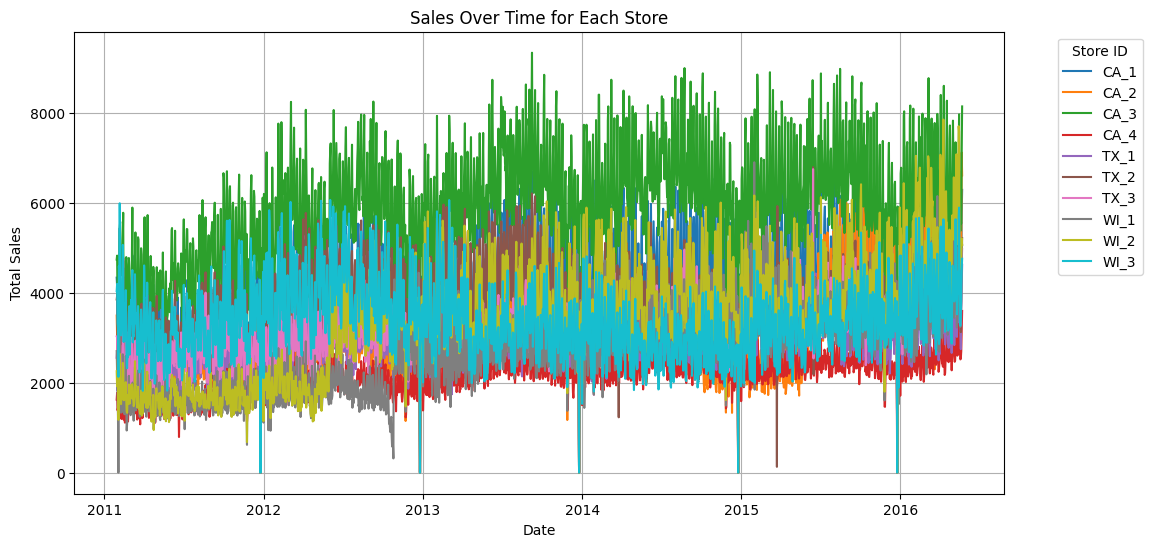

In [44]:
# Aggregate sales per store per day
store_sales = evaluation_long.groupby(['store_id', 'date']).agg({'sales': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=store_sales, x='date', y='sales', hue='store_id')
plt.title('Sales Over Time for Each Store')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


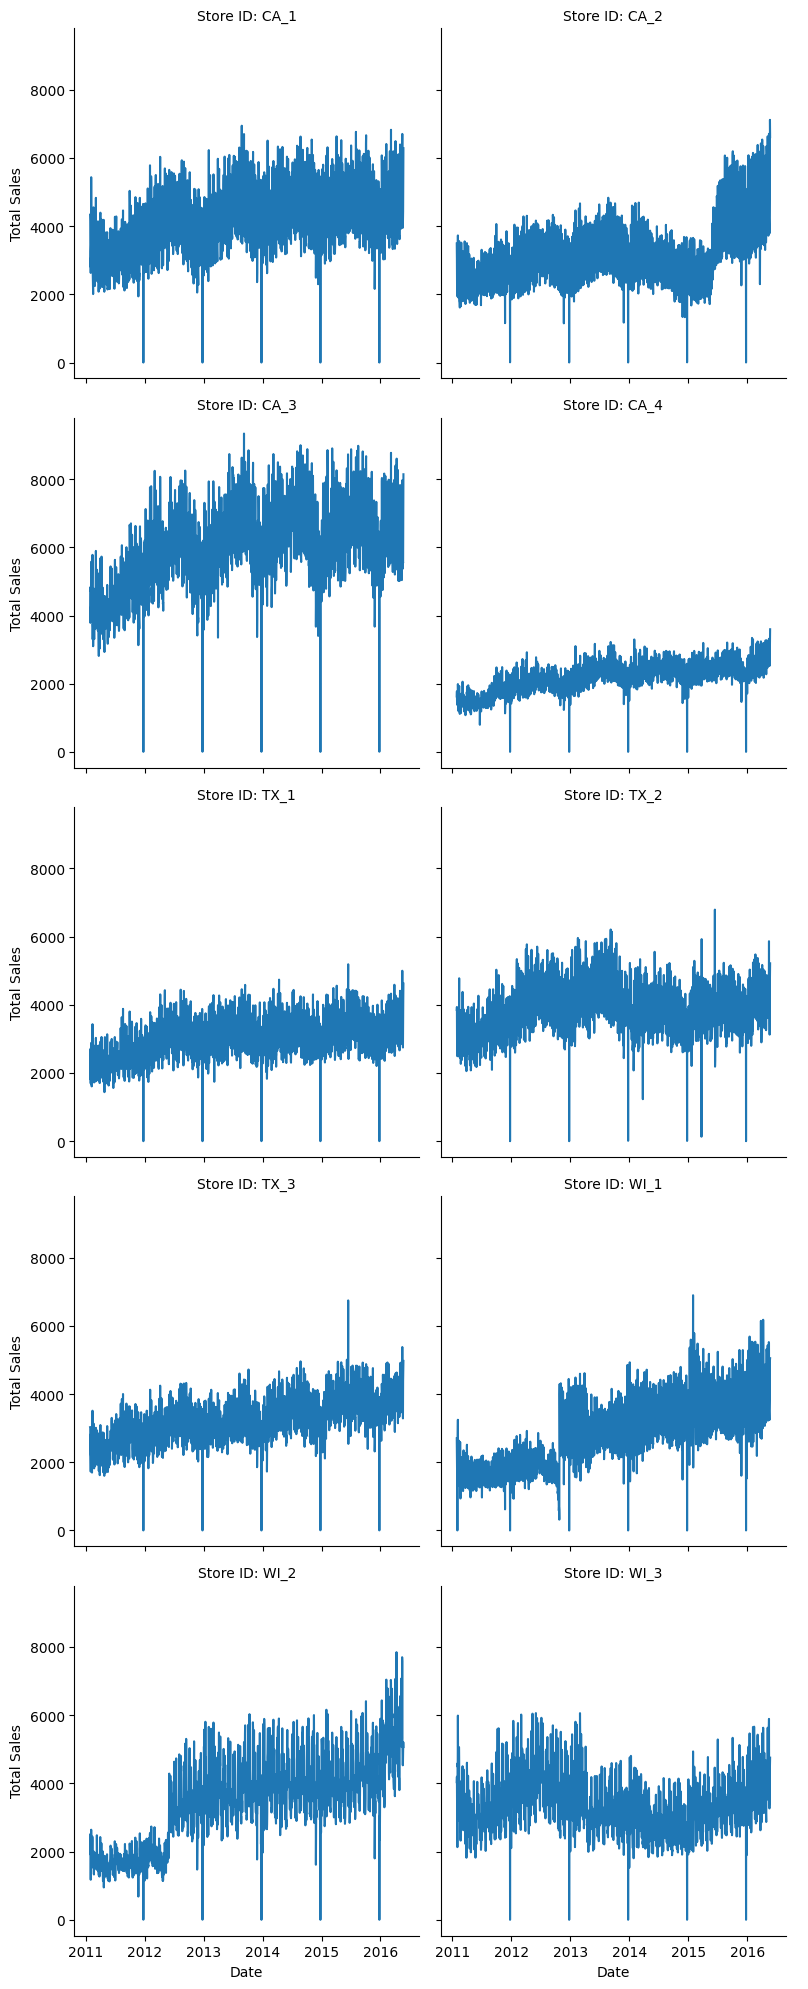

In [45]:
g = sns.FacetGrid(store_sales, col="store_id", col_wrap=2, height=4)
g.map(sns.lineplot, 'date', 'sales')
g.set_axis_labels("Date", "Total Sales")
g.set_titles("Store ID: {col_name}")
g.add_legend()
plt.show()

In [46]:
plt.figure(figsize=(12, 6))
# Convert 'year_month' to string before plotting
sns.lineplot(data=monthly_sales, x=monthly_sales['year_month'].astype(str), y='avg_sales_per_month', hue='store_id')
plt.title('Avarage Month Sales for Each Store')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

KeyError: 'year_month'

<Figure size 1200x600 with 0 Axes>

In [ ]:
weekly_sales = evaluation_long.groupby('day_of_week').agg({'sales': 'mean'}).reset_index()

# Plot weekly sales pattern
plt.figure(figsize=(10, 5))
sns.barplot(data=weekly_sales, x='day_of_week', y='sales', palette='viridis')
plt.title('Average Sales per Day of the Week')
plt.xlabel('Day of the Week (0 = Monday)')
plt.ylabel('Average Sales')
plt.grid()
plt.show()

In [ ]:
yearly_sales = evaluation_long.groupby('year').agg({'sales': 'mean'}).reset_index()

# Plot yearly sales pattern
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_sales, x='year', y='sales', marker='o')
plt.title('Average Sales per Year')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.grid()
plt.show()

In [ ]:
# Aggregate sales by month and year
monthly_yearly_sales = evaluation_long.groupby(['year', 'month']).agg({'sales': 'mean'}).unstack()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_yearly_sales, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Seasonality Heatmap: Average Sales per Month per Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:


# Aggregate sales by event type
event_sales = evaluation_long.groupby(['event_type_1']).agg({'sales': 'mean'}).reset_index()

# Plot sales by event type
plt.figure(figsize=(10, 5))
sns.barplot(data=event_sales, x='event_type_1', y='sales', palette='coolwarm')
plt.title('Average Sales During Events')
plt.xlabel('Event Type')
plt.ylabel('Average Sales')
plt.grid()
plt.show()


## Insights

In [ ]:
average_prices = prices.groupby(['store_id', 'item_id'])['sell_price'].mean().reset_index()
px.box(average_prices, x='store_id', y='sell_price', color='store_id',
             title='Avarage Price Distribution per Store',
             labels={'sell_price': 'Average Price', 'store_id': 'Store ID'}).show()


In [ ]:
#Creating df that contains the first and last week registered
last_first_week = prices.merge(prices.groupby(['store_id', 'item_id']).agg(
    first_week=('wm_yr_wk', 'min'),
    last_week=('wm_yr_wk', 'max')
).reset_index(), on=['store_id', 'item_id'])

#Creating a df that shows the first and last price registered
price_change = last_first_week.loc[last_first_week['wm_yr_wk'] == last_first_week['first_week']].rename(columns={'sell_price': 'start_price'})[['store_id', 'item_id', 'start_price']]
price_change = price_change.merge(last_first_week.loc[last_first_week['wm_yr_wk'] == last_first_week['last_week']].rename(columns={'sell_price': 'final_price'})[['store_id', 'item_id', 'final_price']], on=['store_id', 'item_id'])
price_change


In [ ]:
#Verifying if results are correct for each item (modify item id and store id for accurate results)
prices.loc[(prices['item_id'] == 'HOBBIES_1_001') & (prices['store_id'] == 'CA_1')].sort_values(by='wm_yr_wk')

In [ ]:
price_change['price_diff'] = price_change['final_price'] - price_change['start_price']
price_change

In [ ]:
store_increase = price_change.groupby('store_id')['price_diff'].mean().reset_index()
fig = px.bar(store_increase, x='store_id', y='price_diff',
             title='Total Price Increase per Store',
             labels={'price_increase': 'Avarage Price Increase', 'store_id': 'Store ID'},
             color='price_diff', color_continuous_scale='Reds')
fig.show()

In [ ]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar.info()